In [3]:
# loading images in open cv
import cv2

In [4]:
image = cv2.imread("C:/Users/Owner/Pictures/fcb.jpg")

In [5]:
#image dims
print("Width: {} pixels".format(image.shape[1]))
print("Height: {} pixels".format(image.shape[0]))
print("Channels: {}".format(image.shape[2]))

Width: 1191 pixels
Height: 842 pixels
Channels: 3


In [ ]:
cv2.imshow("Image", image)
cv2.waitKey(0)

In [6]:
# Check pixel value at a certain location
(b, g, r) = image[0, 45]
print("Pixel at (0, 0) - R: {}, G: {}, B: {}".format(r, g, b))


Pixel at (0, 0) - R: 121, G: 109, B: 111


In [7]:
# Change the pixel value at (0, 45) to red
image[0, 45] = (0, 0, 255)
(b, g, r) = image[0, 45]
print("Pixel at (0, 0) - R: {}, G: {}, B: {}".format(r, g, b))

Pixel at (0, 0) - R: 255, G: 0, B: 0


In [8]:
# Get the top-left corner
corner = image[0:100, 0:100]
#cv2.imshow("Corner", corner)

In [9]:
# Make the top-left corner green
image[0:100, 0:100] = (0, 255, 0)

# Show our updated image
cv2.imshow("Updated", image)
cv2.waitKey(0)

13

In [1]:
import numpy as np
import cv2


# Initialize the canvas
canvas = np.zeros((300, 300, 3), dtype="uint8")

# Draw a green line
green = (0, 255, 0)
cv2.line(canvas, (0, 0), (300, 300), green)
cv2.imshow("Canvas", canvas)
cv2.waitKey(0)

# Draw a red line
red = (0, 0, 255)
cv2.line(canvas, (300, 0), (0, 300), red, 3)
cv2.imshow("Canvas", canvas)
cv2.waitKey(0)

# Draw a green rectangle
cv2.rectangle(canvas, (10, 10), (60, 60), green)
cv2.imshow("Canvas", canvas)
cv2.waitKey(0)

# Draw a red rectangle (thickness=5)
cv2.rectangle(canvas, (50, 200), (200, 225), red, 5)
cv2.imshow("Canvas", canvas)
cv2.waitKey(0)

# Draw a blue rectangle (filled)
blue = (255, 0, 0)
cv2.rectangle(canvas, (200, 50), (225, 125), blue, -1)
cv2.imshow("Canvas", canvas)
cv2.waitKey(0)

# Reset the canvas with circles with increasing radii
canvas = np.zeros((300, 300, 3), dtype="uint8")
(center_x, center_y) = (canvas.shape[1] // 2, canvas.shape[0] // 2)
white = (255, 255, 255)

for r in range(0, 175, 25):
    cv2.circle(canvas, (center_x, center_y), r, white)

cv2.imshow("Canvas", canvas)
cv2.waitKey(0)

# Draw 25 random circles
for i in range(0, 25):
    radius = np.random.randint(5, high=200)
    color = np.random.randint(0, high=256, size=(3,)).tolist()
    point = np.random.randint(0, high=300, size=(2,))

    # Draw the random circle
    cv2.circle(canvas, tuple(point), radius, color, -1)

cv2.imshow("Canvas", canvas)
cv2.waitKey(0)

13

In [1]:
#packages for open cv 
import cv2
import sys # system functions (ie. exiting the program)
import os # operating system functions (ie. path building on Windows vs. MacOs)
import time # for time operations
import uuid # for generating unique file names
import math # math functions

from IPython.display import display as ipydisplay, Image, clear_output, HTML # for interacting with the notebook better

import numpy as np # matrix operations (ie. difference between two matricies)
import cv2 # (OpenCV) computer vision functions (ie. tracking)

import matplotlib.pyplot as plt # (optional) for plotting and showing images inline
%matplotlib inline

import keras # high level api to tensorflow (or theano, CNTK, etc.) and useful image preprocessing
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential, load_model, model_from_json
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

#cv2.imwrite("stitched.png", stitched) to write image or save


Using TensorFlow backend.


In [2]:
IMAGES_FOLDER = os.path.join('images') # images for visuals

In [3]:
def bgrtorgb(image):
    return cv2.cvtColor(image.copy(), cv2.COLOR_BGR2RGB)

In [4]:
def show_image(name):
    fname = os.path.join(IMAGES_FOLDER, name)
    ipydisplay(Image(fname))

def plot_image(image, figsize=(8,8), recolour=False):
    if recolour: image = bgrtorgb(image)
    plt.figure(figsize=figsize)
    if image.shape[-1] == 3:
        plt.imshow(image)
    elif image.shape[-1] == 1 or len(image.shape) == 2:
        plt.imshow(image, cmap='gray')
    else:
        raise Exception("Image has invalid shape.")

Image Shape:  (432, 768, 3) 


Image Matrix: 
 [[[ 19  30  50]
  [ 20  28  47]
  [ 21  28  44]
  ...
  [113  79  70]
  [111  78  69]
  [110  77  68]]

 [[ 18  33  52]
  [ 20  33  50]
  [ 24  34  46]
  ...
  [115  78  70]
  [113  79  70]
  [111  78  69]]

 [[ 15  37  51]
  [ 20  38  52]
  [ 29  39  51]
  ...
  [117  79  70]
  [117  80  71]
  [117  80  71]]

 ...

 [[ 89 124  30]
  [ 91 126  32]
  [ 93 128  34]
  ...
  [104 147  31]
  [100 143  27]
  [ 96 139  23]]

 [[ 89 124  32]
  [ 91 126  34]
  [ 92 127  35]
  ...
  [108 150  42]
  [104 146  38]
  [100 142  34]]

 [[ 90 125  35]
  [ 91 126  36]
  [ 92 127  37]
  ...
  [114 155  53]
  [109 150  48]
  [105 146  44]]] 


Image Plotted:


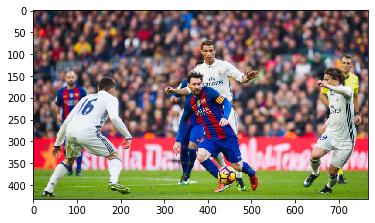

In [10]:
fb_fname = os.path.join(IMAGES_FOLDER, 'football.jpg')
fb_img = cv2.imread(fb_fname)
# comment out the line below to see the colour difference
fb_img = cv2.cvtColor(fb_img, cv2.COLOR_BGR2RGB)

print('Image Shape: ', fb_img.shape, '\n\n')
print('Image Matrix: \n', fb_img, '\n\n')
print('Image:')
plt.imshow(fb_img)

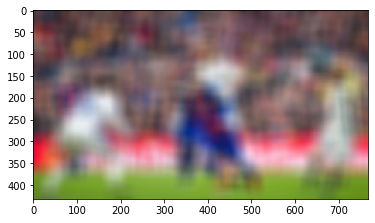

In [15]:
###blurring the image and reducing the noise

blur_fb = fb_img.copy()
blur_fb = cv2.blur(blur_fb, (41,41))
plt.imshow(blur_fb)

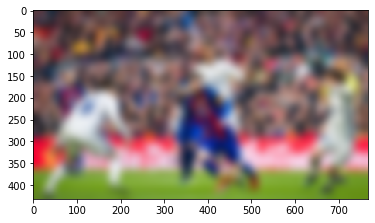

In [14]:
###Guassian blurring

blur2_fb = fb_img.copy()
blur2_fb = cv2.GaussianBlur(blur2_fb, (41,41), 10)
plt.imshow(blur2_fb)

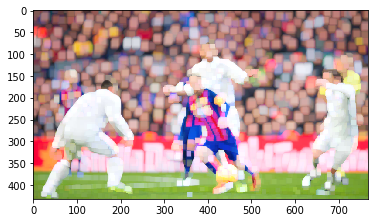

In [17]:
###dilating image

dil_fb = fb_img.copy()
dil_fb = cv2.dilate(dil_fb, np.ones((10,10), dtype=np.uint8), iterations=1)
plt.imshow(dil_fb)

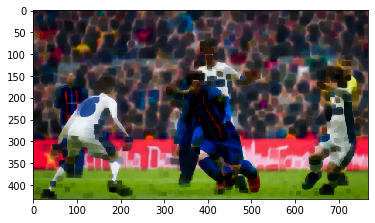

In [22]:
### erotion image

eros_fb = fb_img.copy()
eros_fb = cv2.erode(eros_fb, np.ones((10,10), dtype = np.uint8), iterations=1)
plt.imshow(eros_fb)

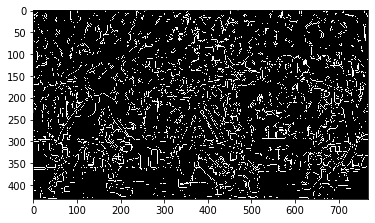

In [27]:
###CANNY EDGE DETECTOR

img = fb_img.copy()
img = cv2.erode(img, np.ones((10,10), dtype = np.uint8), iterations=1)
t = 100
edges = cv2.Canny(img, t, t)
plt.imshow(edges.astype(np.uint8), cmap='gray')

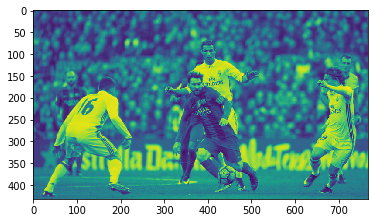

In [28]:
gray_img = fb_img.copy()
gray_img = cv2.cvtColor(gray_img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img)

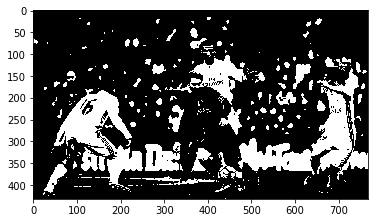

In [36]:
ret, t = cv2.threshold(gray_img, 150, 255, cv2.THRESH_BINARY)
plt.imshow(t, cmap='gray')

In [ ]:
##background subtraction

